# PCA

In [4]:
# import data
from sklearn.datasets import load_breast_cancer

breast=load_breast_cancer()
breast_data=breast.data
breast_label=breast.target
print("Data:", breast_data.shape)
print("Label:", breast_label.shape)

Data: (569, 30)
Label: (569,)


In [10]:
# gabung data
import numpy as np
label=np.reshape(breast_label,(569,1))
final_breast_data=np.concatenate([breast_data,label],axis=1)
final_breast_data.shape

(569, 31)

In [11]:
# create dataframe
import pandas as pd
breast_dataset=pd.DataFrame(final_breast_data)
features=breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# belum ada label, tambahkan kembali
features_label=np.append(features,'label')
breast_dataset.columns=features_label

In [13]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [14]:
# replace label 0: Benign dan 1: Malignant
breast_dataset['label'].replace(0,'Benign',inplace=True)
breast_dataset['label'].replace(1,'Malignant',inplace=True)

In [15]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [16]:
from sklearn.preprocessing import StandardScaler
x=breast_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x) #normalizing features
x.shape #bukan dataframe

(569, 30)

In [20]:
# buat dataframe berisi data yg dinormalisasi
feat_cols=['features'+str(i) for i in range(x.shape[1])] 
normalised_breast=pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,features0,features1,features2,features3,features4,features5,features6,features7,features8,features9,...,features20,features21,features22,features23,features24,features25,features26,features27,features28,features29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [22]:
from sklearn.decomposition import PCA
pca_breast=PCA(n_components=2)
principalComponents_breast=pca_breast.fit_transform(x)
principal_breast_df=pd.DataFrame(data=principalComponents_breast,
                                columns=['principal component 1','principal component 2'])

In [23]:
principal_breast_df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [24]:
print('Explained variation per principal component:{}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component:[0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

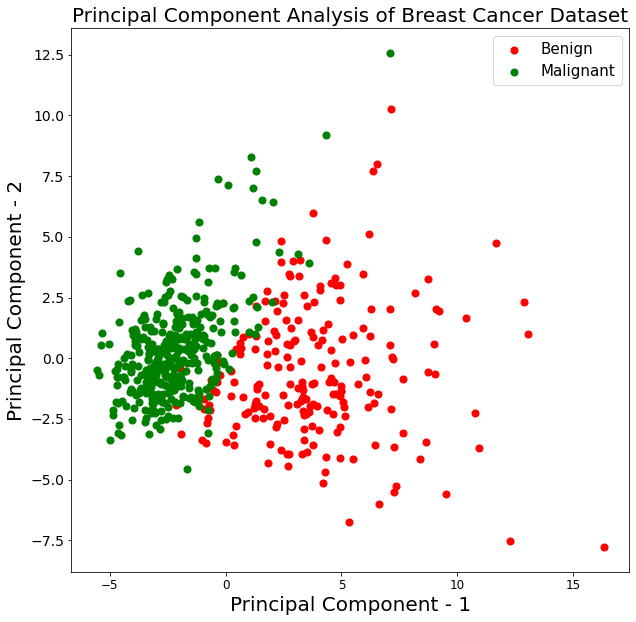

In [34]:
# visualisasi sumbu principal component 1 dan 2

import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets=['Benign','Malignant']
colors=['r','g']

for target, color in zip(targets,colors):
    indicesToKeep=breast_dataset['label']==target
    plt.scatter(principal_breast_df.loc[indicesToKeep,'principal component 1'],
                principal_breast_df.loc[indicesToKeep,'principal component 2'],
               c=color,s=50)
plt.legend(targets,prop={'size':15})
plt.show()

In [29]:
principal_breast_df.shape

(569, 2)

In [31]:
breast_dataset['label'].shape

(569,)

# K means

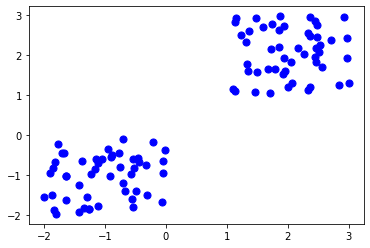

In [39]:
from sklearn.cluster import KMeans
X=-2*np.random.rand(100,2)
X1=1+2*np.random.rand(50,2)
X[50:100,:]=X1

plt.scatter(X[:,0],X[:,1],s=50,c='b')
plt.show()

C:\Users\3330218\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


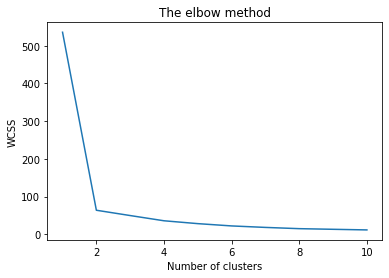

In [40]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,
                  n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [44]:
Kmean=KMeans(n_clusters=2)
Kmean.fit(X)


KMeans(n_clusters=2)

In [45]:
KMeans(algorithm='auto',
      copy_x=True,
      init='k-means++',
      max_iter=300,
      n_clusters=2,
      n_init=10,
      n_jobs=None,
      precompute_distances='auto',
      random_state=None,
      tol=0.0001,
      verbose=0)
Kmean.cluster_centers_

array([[-1.03306679, -1.0268043 ],
       [ 2.02397703,  2.0616894 ]])

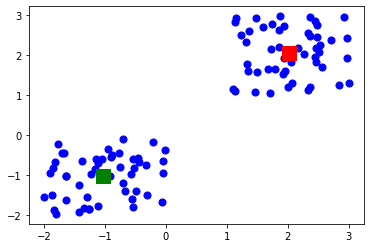

In [46]:
plt.scatter(X[:,0],X[:,1],s=50,c='b')
plt.scatter(-1.03306679, -1.0268043,s=200,c='g',marker='s')
plt.scatter(2.02397703,  2.0616894,s=200,c='r',marker='s')
plt.show()

# Segmentasi Pelanggan Grosir

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [48]:
# baca data
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [49]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [50]:
#standardizing the data to get the same magnitude
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()


,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [51]:
# train the data
kmeans=KMeans(n_clusters=2,init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [52]:
kmeans.inertia_

2599.3855593561393

C:\Users\3330218\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\3330218\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\3330218\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\3330218\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was depr

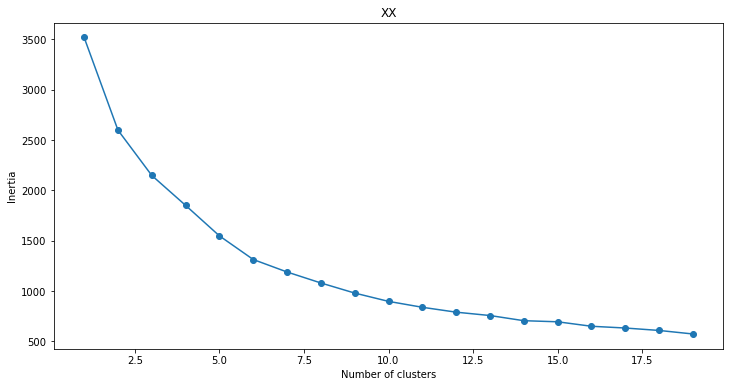

In [54]:
# Visualisasi inersia di setiap jumlah cluster
SSE=[]

for cluster in range(1,20):
    kmeans=KMeans(n_jobs=-1, n_clusters=cluster,init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame=pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.title('XX')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') #within cluster sum of squares
plt.show()

In [55]:
kmeans=KMeans(n_jobs=-1,n_clusters=8,init='k-means++')
kmeans.fit(data_scaled)
pred=kmeans.predict(data_scaled)

C:\Users\3330218\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [56]:
frame=pd.DataFrame(data_scaled)
frame['cluster']=pred
frame['cluster'].value_counts()

3    175
4     99
2     85
0     41
1     32
6      5
7      2
5      1
Name: cluster, dtype: int64

In [57]:
kmeans.cluster_centers_

array([[-5.85958124e-01,  3.06837875e-01,  2.20613537e+00,
        -1.19291097e-01, -2.32891763e-01,  7.20743321e-01,
        -4.15801071e-01,  3.80233936e-01],
       [ 1.44865163e+00, -3.38679203e-01, -4.76124803e-01,
         1.49503264e+00,  1.86227486e+00, -2.54050900e-01,
         1.98223390e+00,  3.30229500e-01],
       [-5.89640676e-01, -1.59983464e+00, -1.35173422e-01,
        -3.49597890e-01, -4.07886727e-01,  1.35713085e-02,
        -4.21519366e-01, -1.58041886e-01],
       [-6.90297086e-01,  5.90668285e-01, -2.52033049e-01,
        -3.85809244e-01, -4.76606883e-01, -8.06492077e-02,
        -4.42468053e-01, -1.83933396e-01],
       [ 1.44865163e+00,  2.90273137e-01, -2.88446836e-01,
         2.26645179e-01,  3.89658015e-01, -3.37545635e-01,
         4.03193797e-01, -9.91194755e-03],
       [-6.90297086e-01,  5.90668285e-01,  1.96681731e+00,
         5.17550306e+00,  1.28721685e+00,  6.90059988e+00,
        -5.54861977e-01,  1.64784475e+01],
       [ 1.44865163e+00,  3.320672

In [60]:
scaler.inverse_transform(kmeans.cluster_centers_) #belum dicek kebenaran hasilnya

array([[1.04878049e+00, 2.78048780e+00, 3.98702927e+04, 4.91685366e+03,
        5.74058537e+03, 6.56692683e+03, 9.01268293e+02, 2.59595122e+03],
       [2.00000000e+00, 2.28125000e+00, 5.98543750e+03, 1.68176250e+04,
        2.56286562e+04, 1.84000000e+03, 1.23217500e+04, 2.45509375e+03],
       [1.04705882e+00, 1.30588235e+00, 1.02926588e+04, 3.21903529e+03,
        4.07947059e+03, 3.13774118e+03, 8.74035294e+02, 1.07968235e+03],
       [1.00000000e+00, 3.00000000e+00, 8.81637714e+03, 2.95208571e+03,
        3.42715429e+03, 2.68085143e+03, 7.74268571e+02, 1.00674857e+03],
       [2.00000000e+00, 2.76767677e+00, 8.35636364e+03, 7.46709091e+03,
        1.16500505e+04, 1.43512121e+03, 4.80167677e+03, 1.49694949e+03],
       [1.00000000e+00, 3.00000000e+00, 3.68470000e+04, 4.39500000e+04,
        2.01700000e+04, 3.65340000e+04, 2.39000000e+02, 4.79430000e+04],
       [2.00000000e+00, 2.80000000e+00, 2.56030000e+04, 4.34606000e+04,
        6.14722000e+04, 2.63600000e+03, 2.99742000e+04, 2.

In [58]:
frame.groupby('cluster').describe()

0                                                        \
         count      mean           std       min       25%       50%   
cluster                                                                
0         41.0 -0.585958  4.664722e-01 -0.690297 -0.690297 -0.690297   
1         32.0  1.448652  4.511951e-16  1.448652  1.448652  1.448652   
2         85.0 -0.589641  4.556420e-01 -0.690297 -0.690297 -0.690297   
3        175.0 -0.690297  1.781454e-15 -0.690297 -0.690297 -0.690297   
4         99.0  1.448652  6.695238e-16  1.448652  1.448652  1.448652   
5          1.0 -0.690297           NaN -0.690297 -0.690297 -0.690297   
6          5.0  1.448652  0.000000e+00  1.448652  1.448652  1.448652   
7          2.0 -0.690297  0.000000e+00 -0.690297 -0.690297 -0.690297   

                                 1            ...         6                7  \
              75%       max  count      mean  ...       75%       max  count   
cluster                                       ...                              
0       -0.690297  1.448652   41.0  0.306838  ... -0.375752  0.433918   41.0   
1        1.448652  1.448652   32.0 -0.338679  ...  2.415783  4.482899   32.0   
2       -0.690297  1.448652   85.0 -1.599835  ... -0.432656  0.618698   85.0   
3       -0.690297 -0.690297  175.0  0.590668  ... -0.412708  0.845263  175.0   
4        1.448652  1.448652   99.0  0.290273  ...  0.801902  1.509209   99.0   
5       -0.690297 -0.690297    1.0  0.590668  ... -0.554862 -0.554862    1.0   
6        1.448652  1.448652    5.0  0.332067  ...  7.395486  7.967672    5.0   
7       -0.690297 -0.690297    2.0 -0.055834  ... -0.401002 -0.337956    2.0   

                                                                          \
              mean       std        min        25%        50%        75%   
cluster                                                                    
0         0.380234  1.125875  -0.540264  -0.200529   0.104416   0.479651   
1         0.330229  1.105037  -0.528194  -0.283688  -0.014864   0.501218   
2        -0.158042  0.364407  -0.538844  -0.395424  -0.255199  -0.058529   
3        -0.183933  0.355250  -0.540264  -0.416724  -0.295314  -0.062434   
4        -0.009912  0.490957  -0.540264  -0.358859  -0.086219   0.200089   
5        16.478447       NaN  16.478447  16.478447  16.478447  16.478447   
6         0.420295  0.796485  -0.220764  -0.110004   0.174706   0.503791   
7         0.933164  0.730728   0.416461   0.674813   0.933164   1.191516   

                    
               max  
cluster             
0         4.596234  
1         5.324340  
2         1.891842  
3         1.282307  
4         2.243293  
5        16.478447  
6         1.753747  
7         1.449867  

[8 rows x 64 columns]

# Finalize Model with Pickle

In [61]:
weather = [
    'Sunny',
    'Sunny',
    'Overcast',
    'Rainy',
    'Rainy',
    'Rainy',
    'Overcast',
    'Sunny',
    'Sunny',   
    'Rainy',
    'Sunny',
    'Overcast',
    'Overcast',
    'Rainy'
]

In [62]:
temp = [
    'Hot',
    'Hot',
    'Hot',
    'Mild',
    'Cool',
    'Cool',
    'Cool',
    'Mild',
    'Cool',
    'Mild',
    'Mild',
    'Mild',
    'Hot',
    'Mild'
]

In [63]:
play = [
    'No',
    'No',
    'Yes',
    'Yes',
    'Yes',
    'No',
    'Yes',
    'No',
    'Yes',
    'Yes',
    'Yes',
    'Yes',
    'Yes',
    'No'
]

In [64]:
# import labelencoder
from sklearn import preprocessing
# creating LabelEncoder
le=preprocessing.LabelEncoder()

# converting string labels into numbers
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

# Combining weather and temp into single list of tuples
features=list(zip(weather_encoded,temp_encoded))

# import Gaussiyan Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

#create a Gaussian Classifier
model=GaussianNB()

# train the model using training sets
model.fit(features,label)

#save model to disk
import pickle
filename='finalized_model.sav'
pickle.dump(model,open(filename,'wb'))

In [65]:
loaded_model=pickle.load(open('finalized_model.sav','rb'))

In [66]:
loaded_model.predict([[0,2]])

array([1], dtype=int64)